In [2]:
# import matplotlib.pyplot as plt
# import numpy as np
# Negative_Class = np.array([[1, 1],[2, 1],[1,-1], [2,-1]])
# Positive_Class = np.array([[4,0],[5,1],[5,-1],[6,0]])
# # print(Negative_Class[:,0])

In [26]:
def plot_points(Negative_Class,Positive_Class):
    plt.scatter(Negative_Class[:,0],Negative_Class[:,1],)
    plt.scatter(Positive_Class[:,0],Positive_Class[:,1],marker="d",)

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_points(class_data, marker='o', color='blue', label=None):
    plt.scatter(
        class_data[:, 0],
        class_data[:, 1],
        marker=marker,
        color=color,
        label=label
    )

def calculate_distances(class1, class2):
    length = len(class1)
    distances = np.empty((length, length), int)

    for x in range(length):
        distances[x] = np.sum((class2[:, 0] - class1[x][0])**2 + (class2[:, 1] - class1[x][1])**2, axis=0)

    return distances

In [28]:
def find_support_vector(class1, class2):
    distances = calculate_distances(class1, class2)
    min_dist = np.min(distances, axis=0)
    min_ind = np.nonzero(min_dist == np.min(min_dist))
    support_vector = [class2[:, 0][min_ind], class2[:, 1][min_ind]]

    return support_vector

In [29]:
def plot_support_vector(support_vector, marker='o', color='blue', edgecolor='green', label=None):
    plt.scatter(
        support_vector[0],
        support_vector[1],
        marker=marker,
        color=color,
        linewidths=2,
        edgecolor=edgecolor,
        s=200,
        label=label
    )


In [30]:
# Data
Negative_Class = np.array([[1, 0], [0, 1], [0, -1], [-1,0]])
Positive_Class = np.array([[3, 1], [3, -1], [6, 1], [6, -1]])

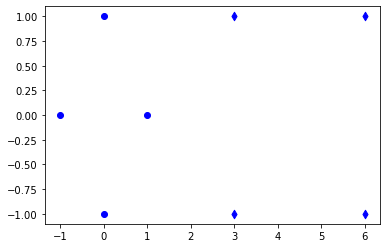

In [31]:
# Plotting
plot_points(Negative_Class, label='Negative Class')
plot_points(Positive_Class, marker='d', label='Positive Class')

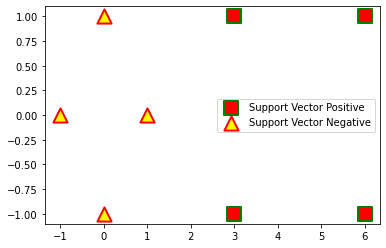

In [32]:
# Support Vectors for Positive Class
support_vector_positive = find_support_vector(Negative_Class, Positive_Class)
plot_support_vector(support_vector_positive, marker='s', color='red', edgecolor='green', label='Support Vector Positive')

# Support Vectors for Negative Class
support_vector_negative = find_support_vector(Positive_Class, Negative_Class)
plot_support_vector(support_vector_negative, marker='^', color='yellow', edgecolor='red', label='Support Vector Negative')

# Show the plot
plt.legend()
plt.show()

In [42]:
import numpy as np

def Transformation(x1, x2):
    trans = np.sqrt(x1**2 + x2**2)
    if trans >= 2:
        result1 = 6 - x1 + ((x1) - (x2))**2
        result2 = 6 - x2 + ((x1) - (x2))**2
        return [result1, result2]

negative_Class = np.array([[1, 1], [-1, 1], [-1, -1], [1,-1]])
positive_Class = np.array([[2, 0], [0, 2], [-2, 0], [0, -2]])
transformed_values = Transformation(positive_Class, negative_Class)
print(transformed_values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import numpy as np

def transform_data(positive_class, negative_class):
    transformed_positive = []
    transformed_negative = []
    
    for point in positive_class.T:
        x1, x2 = point
        if np.sqrt(x1*2 + x2*2) >= 2:
            transformed_positive.append([6 - x1 + (x1 - x2)*2, 6 - x2 + (x1 - x2)*2])
        else:
            transformed_positive.append([x1, x2])
    
    for point in negative_class.T:
        x1, x2 = point
        if np.sqrt(x1*2 + x2*2) >= 2:
            transformed_negative.append([6 - x1 + (x1 - x2)*2, 6 - x2 + (x1 - x2)*2])
        else:
            transformed_negative.append([x1, x2])
    
    return np.array(transformed_positive).T, np.array(transformed_negative).T

# Original data
Negative_Class = np.array([[1, -1, -1, 1], [1, 1, -1, -1]])
Positive_Class = np.array([[2, 0, -2, 0], [0, 2, 0, -2]])

# Transform the data
transformed_positive, transformed_negative = transform_data(Positive_Class, Negative_Class)

print("Transformed Positive Class:")
print(transformed_positive)
print("Transformed Negative Class:")
print(transformed_negative)